<a href="https://colab.research.google.com/github/tmalveirac/pessoal_ceara/blob/master/analise_pessoal_ce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Pessoal Ceará - Dados 03/2020

Fonte: https://cearatransparente.ce.gov.br/

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (20,7)

### Importação e tratamento inicial dos dados

In [124]:
df = pd.read_csv('/content/CE_202003.csv', header=None, names=['Servidor',	'Órgão/Entidade',	'Cargo/Função/Emprego',	'Situação funcional',	'Total descontos',	'Abatimento em função do teto constitucional',	'Outros descontos',	'Salário bruto',	'Salário líquido',	'Diárias'])
print(df.shape)
df.describe()

(169619, 10)


,Total descontos,Abatimento em função do teto constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
count,"169,619.00","169,619.00","169,619.00","169,619.00","169,619.00","169,619.00"
mean,"1,405.23",50.63,"1,354.60","4,410.97","3,005.74",4.19
std,"2,436.99",683.26,"2,191.78","4,743.46","2,715.76",72.15
min,0.00,0.00,0.00,0.03,0.00,0.00
25%,164.33,0.00,164.33,"1,537.28","1,254.18",0.00
50%,622.84,0.00,622.14,"3,279.25","2,464.00",0.00
75%,"1,766.99",0.00,"1,764.49","5,614.96","3,762.18",0.00
max,"50,136.81","40,428.69","41,213.25","156,755.80","115,542.55","14,313.32"


In [0]:
df['salario_com_abate_teto'] = df['Salário bruto'] - df['Abatimento em função do teto constitucional']

### Análise exploratória - Por Órgão

In [126]:
#Qtd por órgão
qtd_orgao_df = df['Órgão/Entidade'].value_counts()
qtd_orgao_df.describe()

count       55.00
mean     3,083.98
std      8,663.76
min         16.00
25%        106.00
50%        312.00
75%      1,604.50
max     52,681.00
Name: Órgão/Entidade, dtype: float64

In [127]:
#Quantidade em Percentual 
df['Órgão/Entidade'].value_counts(normalize=True).sort_values(ascending=False).head(10) * 100

SEDUC        31.06
PMCE         18.86
SEDUC-CPTD   10.97
SESA          9.25
SUPSEC        4.21
SESA-ACS      3.96
PC            3.19
SAP           2.56
FUNECE        1.55
SEFAZ         1.54
Name: Órgão/Entidade, dtype: float64

In [128]:
qtd_orgao_df.sort_values(ascending=False).tail(10)

CIDADES     76
SECITECE    74
ARCE        71
SEMA        47
SEDET       40
FUNCAP      38
SETUR       37
IPECE       30
EGPCE       21
VICEGOV     16
Name: Órgão/Entidade, dtype: int64

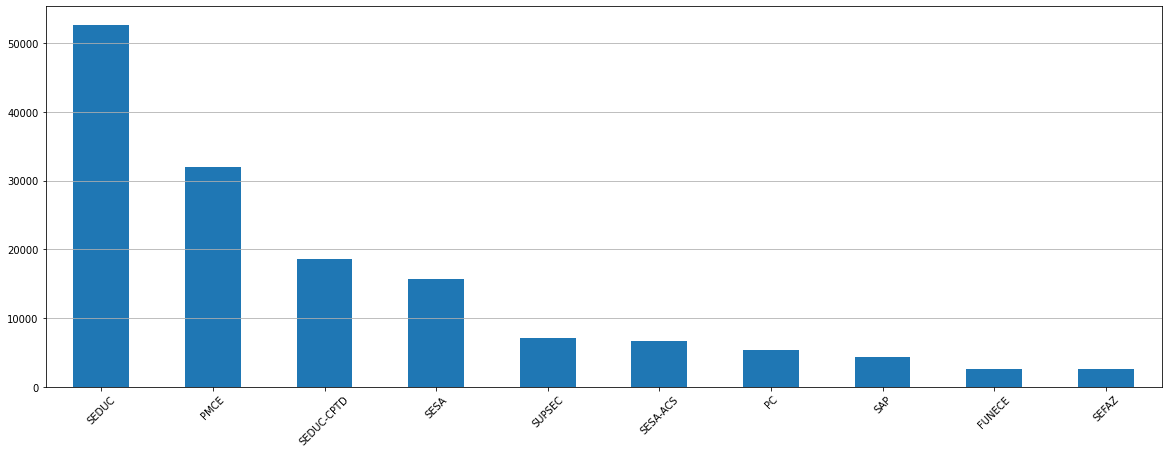

In [129]:
qtd_orgao_df.sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.xticks(rotation='45')
plt.show()

In [130]:
#Valor por órgão
valor_orgao_df = df.groupby('Órgão/Entidade')['salario_com_abate_teto'].sum()
valor_orgao_df.describe()

count            55.00
mean     13,447,212.01
std      33,625,913.63
min          53,801.91
25%         450,920.69
50%       1,389,427.14
75%       7,574,280.98
max     177,845,872.23
Name: salario_com_abate_teto, dtype: float64

In [131]:
valor_orgao_df.sort_values(ascending=False).tail(10)

Órgão/Entidade
SECITECE   355,344.45
SEJUV      284,009.79
IPECE      275,751.26
CEE        211,146.72
SEDET      202,880.07
SEMA       168,005.71
SETUR      140,531.14
FUNCAP      93,933.45
VICEGOV     91,955.37
EGPCE       53,801.91
Name: salario_com_abate_teto, dtype: float64

In [155]:
#Valor em Percentual
valor_perc_orgao_df = valor_orgao_df * 100 / valor_orgao_df.sum()
valor_perc_orgao_df.sort_values(ascending=False).head(10)

Órgão/Entidade
SEDUC        24.05
PMCE         22.01
SEFAZ         8.59
SESA          7.56
PC            5.36
SEDUC-CPTD    4.30
SUPSEC        3.96
SAP           3.43
FUNECE        3.32
CBMCE         2.44
Name: salario_com_abate_teto, dtype: float64

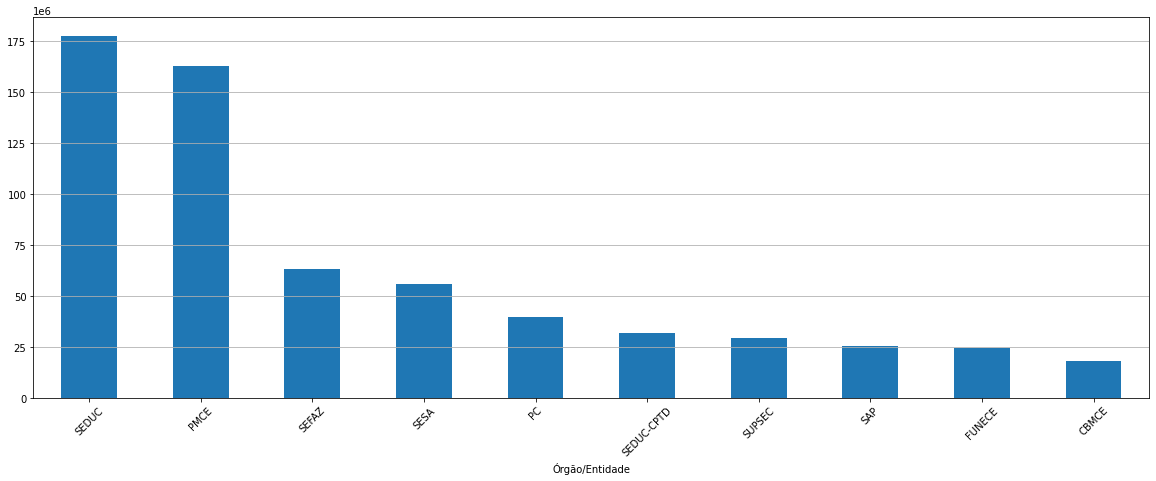

In [132]:
valor_orgao_df.sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) #Em milhões
plt.xticks(rotation='45')
plt.show()

### Análise exploratória - Por Cargo

In [144]:
#Qtd por cargo
qtd_cargo_df = df['Cargo/Função/Emprego'].value_counts()
qtd_cargo_df.describe()

count      600.00
mean       278.77
std      1,912.94
min          1.00
25%          1.00
50%          5.50
75%         45.00
max     38,803.00
Name: Cargo/Função/Emprego, dtype: float64

In [145]:
#Quantidade em Percentual 
df['Cargo/Função/Emprego'].value_counts(normalize=True).sort_values(ascending=False).head(10) * 100

PROFESSOR                     23.20
PROF CTPD LP                  10.17
SOLDADO PRONTO                 5.77
AUXILIAR DE SERVICOS GERAIS    5.74
PENSAO CIVIL                   4.54
AG COMUN SAUDE                 4.02
AGENTE DE ADMINISTRACAO        2.85
PEN MONTEP MIL                 2.76
CABO                           2.63
SUBTENENTE                     2.34
Name: Cargo/Função/Emprego, dtype: float64

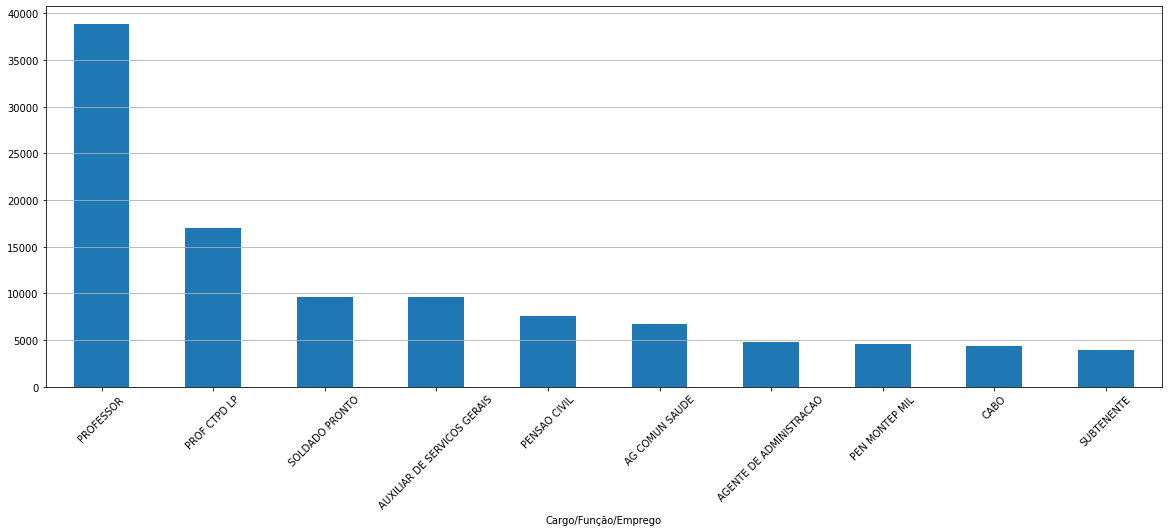

In [134]:
qtd_cargo_df.sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.xticks(rotation='45')
plt.show()

In [135]:
#Valor por órgão
valor_cargo_df = df.groupby('Cargo/Função/Emprego')['salario_com_abate_teto'].sum()
valor_cargo_df.describe()

count           600.00
mean      1,224,006.13
std       8,277,203.07
min              58.05
25%           8,412.41
50%          22,155.83
75%         215,540.16
max     182,465,838.05
Name: salario_com_abate_teto, dtype: float64

In [136]:
valor_cargo_df.sort_values(ascending=False).tail(10)

Cargo/Função/Emprego
ARQUIVISTA TAPE               1,045.00
PROGRAM MUSICAL               1,045.00
PRESTADOR DE SERVICO          1,045.00
AGENTE ADM POL                1,045.00
ASSIST JURIDICO               1,045.00
AUX SERV SAUDE                1,045.00
ASSESSOR EXECUTIVO DO PACTO     990.42
Delegado Adjunto I              814.28
PREST SERVICOS                  225.58
DAS-1 - COORDENADOR ESCOLAR      58.05
Name: salario_com_abate_teto, dtype: float64

In [156]:
#Valor em Percentual
valor_perc_cargo_df = valor_cargo_df * 100 / valor_orgao_df.sum()
valor_perc_cargo_df.sort_values(ascending=False).head(10)

Cargo/Função/Emprego
PROFESSOR                                    24.67
SOLDADO PRONTO                                6.04
PROF CTPD LP                                  3.96
PENSAO CIVIL                                  3.66
SUBTENENTE                                    3.47
AGENTE PENITENCIARIO                          3.17
AUDITOR FISCAL DA RECEITA ESTADUAL            3.03
MEDICO                                        2.87
CABO                                          2.85
AUDITOR FISCAL ADJUNTO DA RECEITA ESTADUAL    2.59
Name: salario_com_abate_teto, dtype: float64

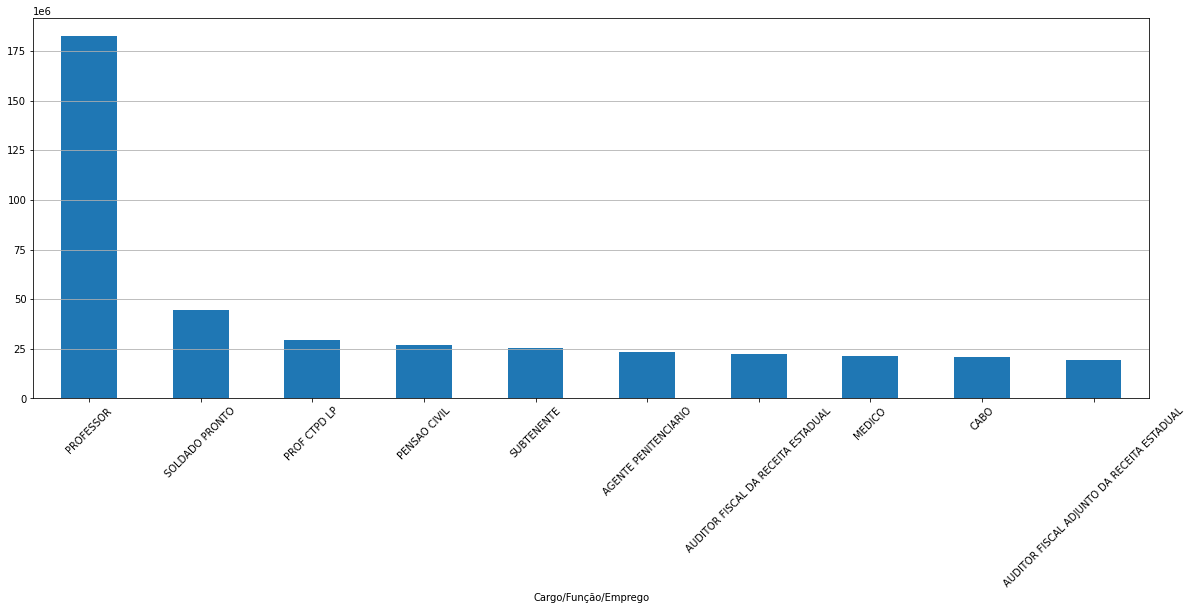

In [137]:
valor_cargo_df.sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) #Em milhões
plt.xticks(rotation='45')
plt.show()

### Análise exploratória - Por Situação Funcional

In [146]:
#Qtd por Situação funcional
qtd_sit_df = df['Situação funcional'].value_counts()
qtd_sit_df.describe()

count         4.00
mean     41,849.50
std      43,594.36
min         703.00
25%      14,458.00
50%      33,003.00
75%      60,394.50
max     100,689.00
Name: Situação funcional, dtype: float64

In [147]:
#Quantidade em Percentual 
df['Situação funcional'].value_counts(normalize=True).sort_values(ascending=False).head(10) * 100

Ativo                 60.15
Aposentado            28.05
Pensionista           11.38
Estagiágio/Bolsista    0.42
Name: Situação funcional, dtype: float64

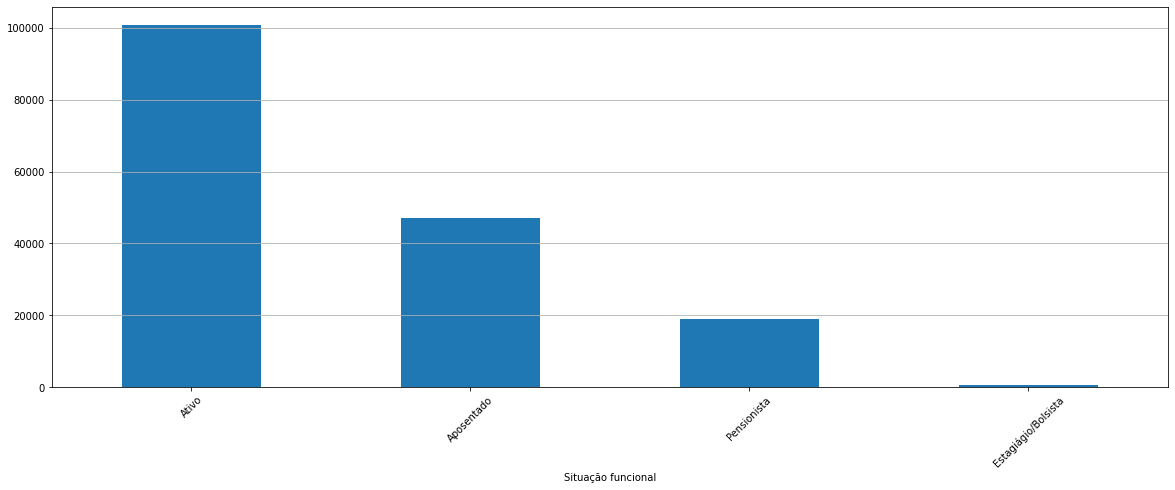

In [139]:
qtd_sit_df.sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.xticks(rotation='45')
plt.show()

In [140]:
#Valor por situação
valor_sit_df = df.groupby('Situação funcional')['salario_com_abate_teto'].sum()
valor_sit_df.describe()

count             4.00
mean    181,870,813.91
std     212,037,616.87
min         370,235.72
25%      48,780,527.02
50%     124,080,382.79
75%     257,170,669.68
max     478,952,254.35
Name: salario_com_abate_teto, dtype: float64

In [141]:
valor_sit_df.sort_values(ascending=False).tail(10)

Situação funcional
Ativo                 478,952,254.35
Aposentado            183,243,474.79
Pensionista            64,917,290.78
Estagiágio/Bolsista       370,235.72
Name: salario_com_abate_teto, dtype: float64

In [157]:
#Percentual
valor_perc_sit_df = valor_sit_df * 100 / valor_sit_df.sum()
valor_perc_sit_df.sort_values(ascending=False)

Situação funcional
Ativo                 65.84
Aposentado            25.19
Pensionista            8.92
Estagiágio/Bolsista    0.05
Name: salario_com_abate_teto, dtype: float64

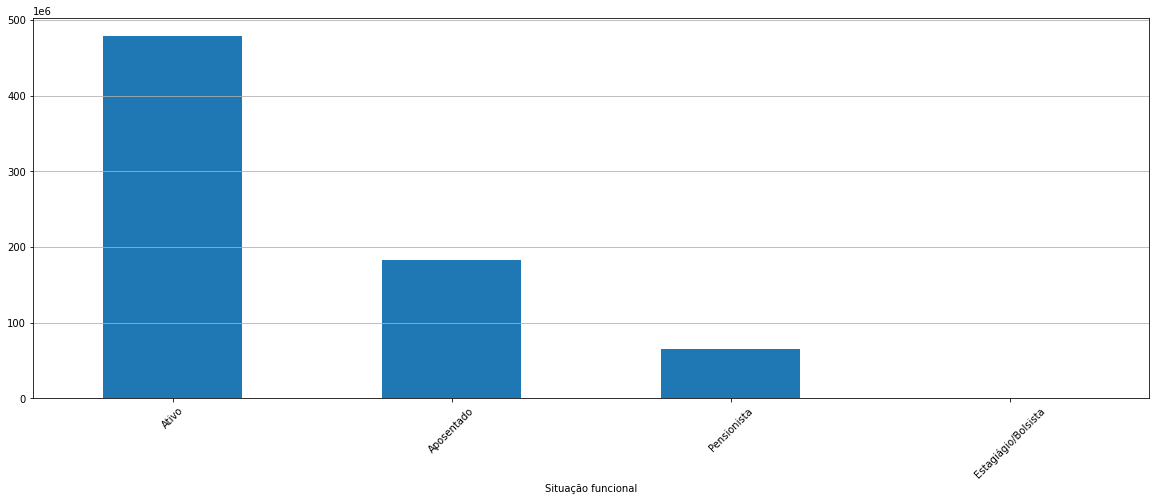

In [142]:
valor_sit_df.sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) #Em milhões
plt.xticks(rotation='45')
plt.show()

Situação funcional
Ativo                 65.84
Aposentado            25.19
Pensionista            8.92
Estagiágio/Bolsista    0.05
Name: salario_com_abate_teto, dtype: float64